In [28]:
import pandas as pd
import numpy as np  #for mathematical calculations
import seaborn as sns #for data visualization
import matplotlib.pyplot as plt
import seaborn as sn #for plotting graphs
%matplotlib inline
import warnings  #to ignore any warnings
warnings.filterwarnings("ignore")

In [7]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

explore the features present in our data and then we will look at their data types

In [8]:
train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [9]:
test.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [10]:
train.shape, test.shape

((31647, 18), (13564, 17))

we have 17 independent variable and 1 target variable in the train dataset the extra column present in train is subscribed we will predict the subscribed with the help of model built using the train data.

In [11]:
train.dtypes


ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

object=it means that variables are categorical
int64= it represent the integer variables

In [12]:
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


univariate analysis
look at the distribution of our target variable as it is categorical variable , then lets look at it by frequency table percentage distribution and bar plot

In [13]:
train['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

In [15]:
#normalize can br true to print proportions instead of numbers we do normalize to true because it returns frequency by dividing all values by the sum of values
#Normalization makes the features more consistent with each other, which allows the model to predict outputs more accurately.it converts the value from 0 to 1
train['subscribed'].value_counts(normalize=True)

no     0.882611
yes    0.117389
Name: subscribed, dtype: float64

<AxesSubplot:>

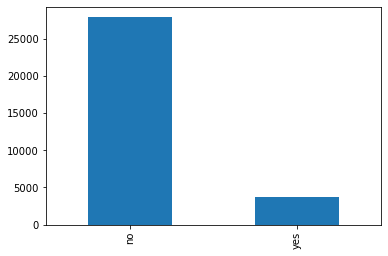

In [20]:
#plotting the bar plot of frequencies
train['subscribed'].value_counts().plot.bar()

So, 3715 users out of total 31647 have subscribed which is around 12%. Let's now explore the variables to have a better understanding of the dataset. We will first explore the variables individually using univariate analysis, then we will look at the relation between various independent variables and the target variable. We will also look at the correlation plot to see which variables affects the target variable most.

Let's first look at the distribution of age variable to see how many people belongs to a particular age group.

<AxesSubplot:xlabel='age', ylabel='Density'>

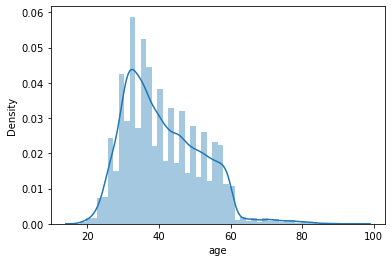

In [21]:
sn.distplot(train["age"])

In [35]:
train.loc[:,"job"]

0            admin.
1           unknown
2          services
3        management
4        technician
            ...    
31642    management
31643    management
31644    management
31645    technician
31646    management
Name: job, Length: 31647, dtype: object

We can infer that most of the clients fall in the age group between 20-60. Now let's look at what are the different types of jobs of the clients. As job is a categorical variable, we will look at its frequency table

<AxesSubplot:>

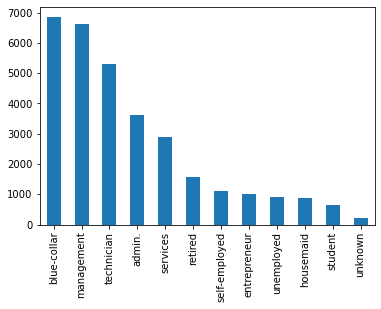

In [39]:
train['job'].value_counts().plot.bar()

We see that most of the clients belongs to blue-collar job and the students are least in number as students generally do not take a term deposit. Let's also look at how many clients have default history.

<AxesSubplot:>

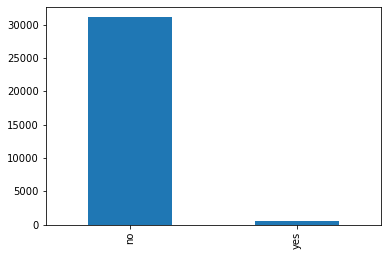

In [40]:
train['default'].value_counts().plot.bar()

More than 90% of the clients have no default history. Now we will explore these variables against the target variable using bivariate analysis. We will make use of scatter plots for continuous or numeric variables and crosstabs for the categorical variables. Let's start with job and subscribed variable.

# Bivariate Analysis

subscribed       no  yes
job                     
admin.         3179  452
blue-collar    6353  489
entrepreneur    923   85
housemaid       795   79
management     5716  923
retired        1212  362
self-employed   983  140
services       2649  254
student         453  182
technician     4713  594
unemployed      776  129
unknown         180   26


Text(0, 0.5, 'Percentage')

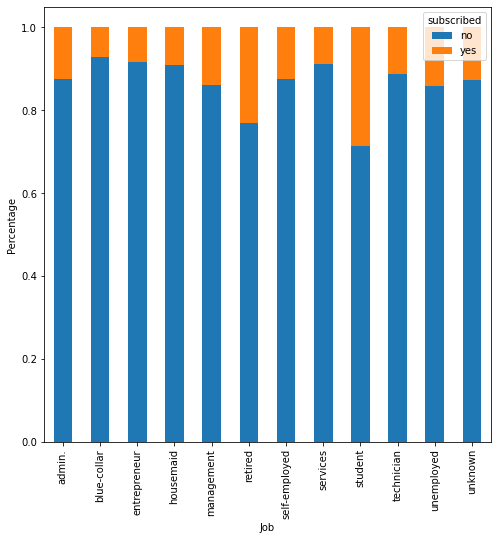

In [45]:
print(pd.crosstab(train['job'],train['subscribed']))

job=pd.crosstab(train['job'],train['subscribed'])
job.div(job.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('Job')
plt.ylabel('Percentage')

From the above graph we can infer that students and retired people have higher chances of subscribing to a term deposit, which is surprising as students generally do not subscribe to a term deposit. The possible reason is that the number of students in the dataset is less and comparatively to other job types, more students have subscribed to a term deposit.

Next, let's explore the default variable against the subscribed variable.

subscribed     no   yes
default                
no          27388  3674
yes           544    41


Text(0, 0.5, 'Percentage')

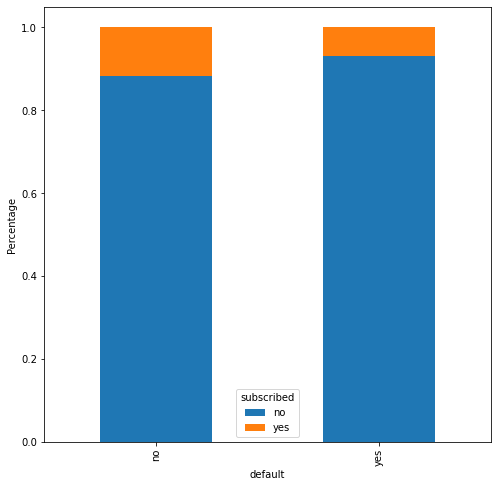

In [46]:
print(pd.crosstab(train['default'],train['subscribed']))

default=pd.crosstab(train['default'],train['subscribed'])
default.div(default.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('default')
plt.ylabel('Percentage')

We can infer that clients having no previous default have slightly higher chances of subscribing to a term loan as compared to the clients who have previous default history.

Let's now look at how correlated our numerical variables are. We will see the correlation between each of these variables and the variable which have high negative or positive values are correlated. By this we can get an overview of the variables which might affect our target variable. We will convert our target variable into numeric values first.

In [47]:
train['subscribed'].replace('no', 0, inplace=True)
train['subscribed'].replace('yes', 1,inplace=True)

here cmap equals YlGnBu which represents the colour(blue to yellow)
annot if true write the data value in each cell 
Return the indices for the lower-triangle
mask returns an object of same shape as self and whose cprresponding entries are from self where cond is false

<AxesSubplot:>

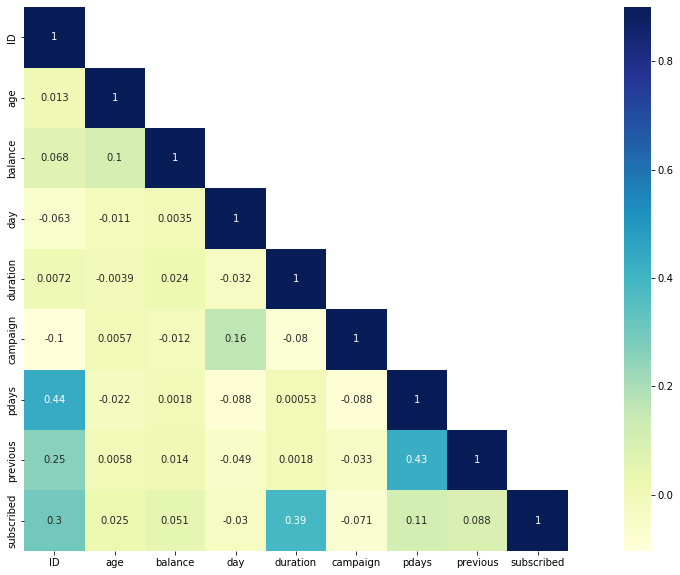

In [49]:
corr = train.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax = plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

We can infer that duration of the call is highly correlated with the target variable. This can be verified as well. As the duration of the call is more, there are higher chances that the client is showing interest in the term deposit and hence there are higher chances that the client will subscribe to term deposit.

Next we will look for any missing values in the dataset.

In [50]:
train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

There are no missing values in the train dataset.

Next, we will start to build our predictive model to predict whether a client will subscribe to a term deposit or not.

As the sklearn models takes only numerical input, we will convert the categorical variables into numerical values using dummies. We will remove the ID variables as they are unique values and then apply dummies. We will also remove the target variable and keep it in a separate variable.

In [54]:
target = train['subscribed']
train = train.drop('subscribed',1)

 Dummy variables are useful because they enable us to use a single regression equation to represent multiple groups. This means that we don’t need to write out separate equation models for each subgroup. The dummy variables act like ‘switches’ that turn various parameters on and off in an equation.we use in qualitative variable
 applying dummies on the train dataset

In [55]:
train = pd.get_dummies(train)

Now, its time to build our model. We will split the train data into training and validation set so that we will be able to validate the results of our model on the validation set. We will keep 20% data as validation set and rest as the training set.

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
# splitting into train and validation with 20% data in validation set and 80% data in train set.
x_train, x_val, y_train, y_val = train_test_split(train, target, test_size = 0.2, random_state=12)
#random_state is an integer value which implies the selection of a random combination of test and train.
#in this random state means that there is a set generated of permutation and combination of train and test and each combination has 12 state

Now our data is ready. Its time to build our model and check its performance. Logistic regression is used for classification problems and as it is a classification problem let's first build a Logistic Regression model.

Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
#defining the logistic regression model
lreg = LogisticRegression()

In [63]:
#fitting the model on x_train and y_train
lreg.fit(x_train,y_train)

LogisticRegression()

In [64]:
#making prediction on the validation set
prediction = lreg.predict(x_val)

Now we will evaluate how accurate our predictions are. As the evaluation metric for this problem is accuracy, let's calculate the accuracy on validation set.

In [65]:
from sklearn.metrics import accuracy_score

In [66]:
#calculating the accuracy score
accuracy_score(y_val, prediction)

0.8870458135860979

We got an accuracy score of around 90% on the validation dataset. Logistic regression has a linear decision boundary. What if our data have non linearity? We need a model that can capture this non linearity.

Let's try decision tree algorithm now to check if we get better accuracy with that.

In [67]:
from sklearn.tree import DecisionTreeClassifier

In [68]:
# defining the decision tree model with depth of 4, you can tune it further to improve the accuracy score
clf = DecisionTreeClassifier(max_depth=5, random_state=0)

In [70]:
# fitting the decision tree model
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [71]:
#making prediction on the validation set
predict = clf.predict(x_val)

In [72]:
#calculating the accuracy score
accuracy_score(y_val,predict)

0.9063191153238547

We got an accuracy of more than 90% on the validation set. You can try to improve the score by tuning hyperparameters of the model. Let's now make the prediction on test dataset. We will make the similar changes in the test set as we have done in the training set before making the predictions.

In [73]:
test = pd.get_dummies(test)

In [74]:
test_presiction = clf.predict(test)

In [75]:
submission = pd.DataFrame()

In [76]:
#creating a Business_Sourced column and saving prediction in it
submission['ID'] = test['ID']
submission['subscribed'] = test_presiction

Since the target variable is yes or no, we will convert 1 and 0 in the predictions to yes and no respectively.

In [77]:
submission['subscribed'].replace(0,'no',inplace=True)
submission['subscribed'].replace(1,'yes',inplace=True)

In [78]:
submission.to_csv('submission.csv', header=True, index=False)

In [79]:
data = pd.read_csv('submission.csv')

In [84]:
submission.columns

Index(['ID', 'subscribed'], dtype='object')

In [85]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [87]:
print(data)

          ID
0      38441
1      40403
2       3709
3      37422
4      12527
5      16013
6        196
7       8516
8      31208
9      38462
10     17041
11      4920
12       802
13      1738
14      9565
15     29743
16     34946
17      1671
18      2868
19      6478
20      1572
21     44771
22     30088
23     19021
24     15704
25     39812
26     21170
27       923
28     17887
29      6778
30     18586
31      7501
32     13932
33     16318
34      8055
35     39970
36      5903
37      8507
38     27726
39     28430
40      3157
41     40327
42     17768
43     44637
44     28671
45      6074
46     44392
47     22711
48     41313
49     32038
50     23107
51      5702
52     33330
53     22357
54     10518
55     17096
56     43876
57     16970
58     29949
59     13281
60      8266
61     15089
62     20091
63     17458
64     10378
65     27033
66     29228
67      9839
68      2477
69     20206
70     10782
71     25825
72     20256
73      1317
74     38949
75     35365